Load the Complete Evaluation Table and aggregate the Absolute Rrrors by Mean --> generating MAE

In [1]:
import pandas as pd

eval_table_path = "./plot_data/complete_evaluation_table.csv"

eval_table = pd.read_csv(eval_table_path)
eval_table = eval_table.groupby(["quantifier", "dataset"]).agg(
        abs_error = pd.NamedAgg(column="abs_error", aggfunc="mean"),
        run_time = pd.NamedAgg(column="run_time", aggfunc="mean")
    )
eval_table.reset_index(inplace=True)

Generate Ranking Plots by Error

C:\Users\coenL\AppData\Local\Temp\ipykernel_4204\3611462182.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=sample, x='quantifier', y='error_rank', order = order, palette = palette)


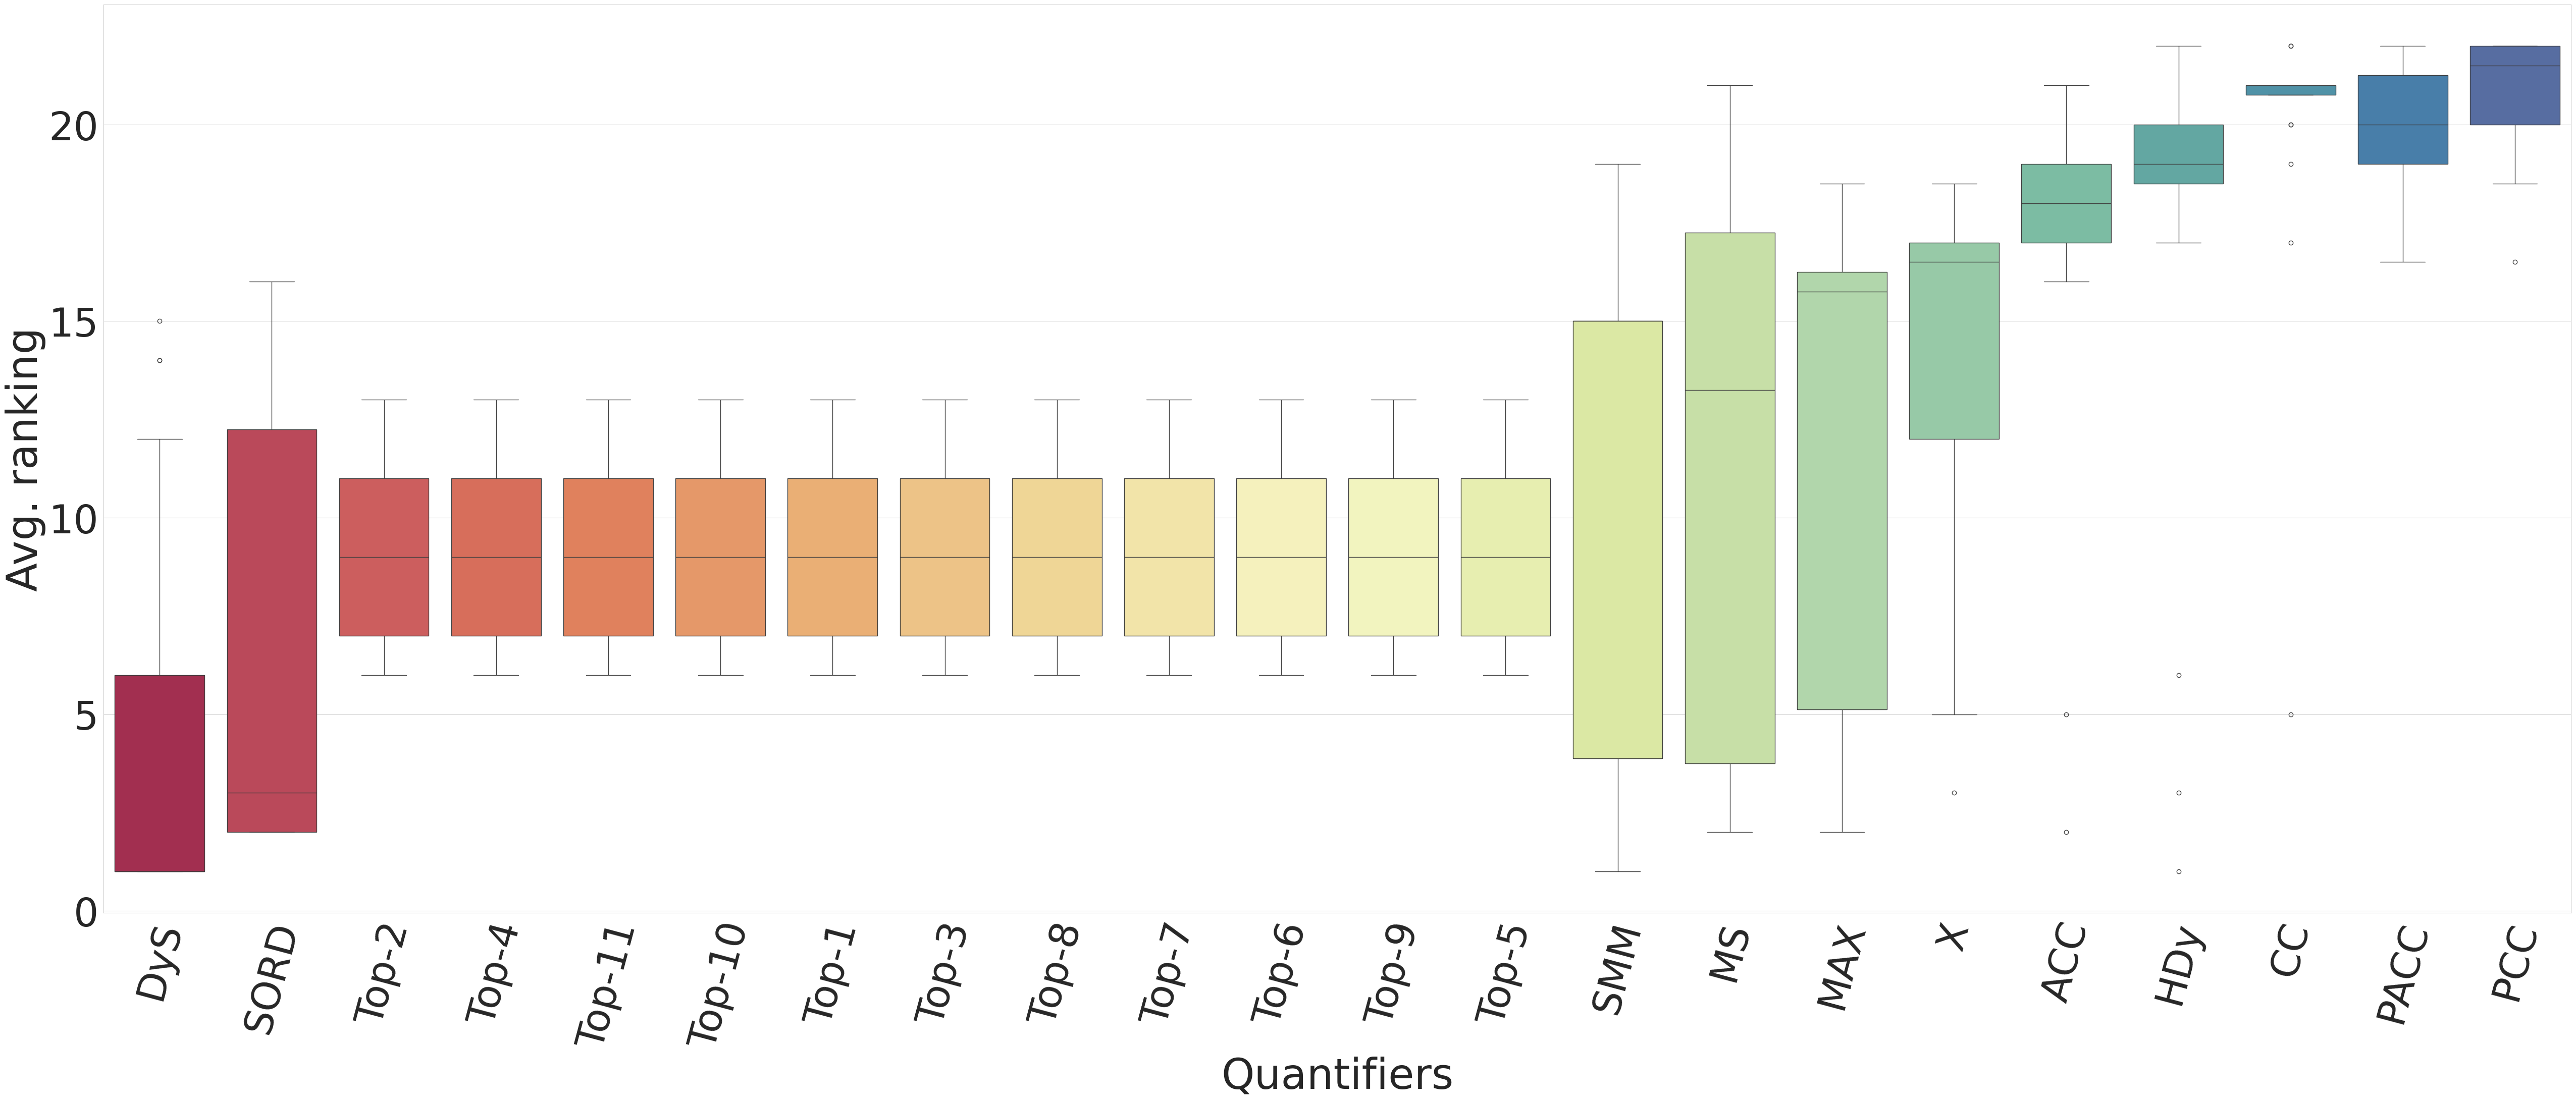

,quantifier,dataset,abs_error,run_time,error_rank
0,ACC,AedesQuinx,0.03960,0.000254,5.0
1,ACC,AedesSex,0.01190,0.000257,17.0
2,ACC,ArabicDigit,0.00895,0.000255,16.0
3,ACC,BNG,0.01170,0.000256,18.0
4,ACC,HTRU,0.03050,0.000259,18.0
...,...,...,...,...,...
435,X,namao,0.02015,0.000370,17.0
436,X,occupancy,0.00960,0.000357,18.0
437,X,phoneme,0.06010,0.000353,5.0
438,X,spambase,0.02880,0.000352,17.0


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .24 # .23
plt_width = 52 # 38
plt_heigth = 24 # 18
plot_rotation = 75
axis_font_size = 56 # 50
labels_size = 60 # 60

def boxplotMae(sample, file=""):
    sample['error_rank'] = sample.groupby(['dataset'], as_index=False )['abs_error'].rank(method='average', ascending = True)

    order = sample.groupby('quantifier')['error_rank'].mean().sort_values().index

    palette = sns.color_palette('Spectral', sample['quantifier'].nunique())

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(plt_width, plt_heigth))
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        ax=sns.boxplot(data=sample, x='quantifier', y='error_rank', order = order, palette = palette)

        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Avg. ranking",fontsize=labels_size)

    plt.show()
    # if file != "":
    #     ax.figure.savefig('./figs/'+file+ '.pdf', format="pdf", facecolor='w')

    return sample

boxplotMae(eval_table)
